In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
#from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
Test = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Outpatientdata-1542969243754.csv")

Train = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Outpatientdata-1542865627584.csv")

In [3]:
Train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
Train_Beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
#Create an Age column for the Beneficiary Details
## Lets Create Age column to the dataset
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format='%Y/%m/%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Train_Beneficiary['Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format='%Y/%m/%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Test_Beneficiary['Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

In [8]:
## We see that the last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.
Train_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y/%m/%d') - Train_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

Test_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y/%m/%d') - Test_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

In [9]:
Train_Beneficiary.head(5)
Test_Beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,2,1,1,2,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,2,2,0,0,1170,660,73.0
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,...,1,2,2,1,1,5000,1068,250,320,96.0
4,BENE11014,1938-04-01,NaT,2,1,Y,45,780,12,12,...,2,1,2,2,2,21260,2136,120,100,72.0


In [10]:
#Lets create a new variable 'Dead' with flag 1 means Dead and 0 means not Dead
#Train_Beneficiary.loc[Train_Beneficiary.DOD.isna(),'Dead']=0
#Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(),'Dead']=1

#Test_Beneficiary.loc[Test_Beneficiary.DOD.isna(),'Dead']=0
#Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(),'Dead']=1

In [11]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format='%Y/%m/%d')
Train_Inpatient['AdmitForDays'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format='%Y/%m/%d')
Test_Inpatient['AdmitForDays'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1

In [12]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatient.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatient.AdmitForDays.max())
Train_Inpatient.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatient.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatient.AdmitForDays.max())
Test_Inpatient.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [13]:
## Combine inpatient and outpatient claims data
Train_Allpatient = Train_Inpatient.append(Train_Outpatient, sort=False)
Test_Allpatient = Test_Inpatient.append(Test_Outpatient, sort=False)

In [14]:
print('Train_Allpatientdata',Train_Allpatient.shape)
print('Test_Allpatientdata',Test_Allpatient.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [15]:
pd.set_option('display.max_columns', None)
Train_Allpatient.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9.0


In [16]:
#Combine Beneficiary Data with Insurance Claims data
Train_AllPatientDetails = pd.merge(Train_Allpatient, Train_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])
Test_AllPatientDetails = pd.merge(Test_Allpatient, Test_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])

In [17]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetails.shape)
print('Shape of All Patient Details Test : ',Test_AllPatientDetails.shape)
Test_AllPatientDetails.head(2)

Shape of All Patient Details Train :  (558211, 56)
Shape of All Patient Details Test :  (135392, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,8.0,1938-04-01,NaT,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,72.0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaT,NaN,0.0,NaT,NaN,73721,7224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-04-01,NaT,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,72.0


In [18]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join
Train_ProviderWithPatientDetails=pd.merge(Train,Train_AllPatientDetails,on='Provider')
Test_ProviderWithPatientDetails=pd.merge(Test,Test_AllPatientDetails,on='Provider')

In [19]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetails.shape)

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetails.shape)
Test_ProviderWithPatientDetails.head(2)

Shape of Train Provider with Patient Details data :- (558211, 57)
Shape of Test Provider with Patient Details data :- (135392, 56)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,NaT,78060,0.0,NaT,NaN,7840,V4502,2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921-02-01,NaT,2,1,0,1,100,0,12,2,1,1,2,1,1,1,1,2,2,2,22000,3204,1020,910,89.0
1,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,NaT,41401,0.0,NaT,NaN,V4581,V173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921-02-01,NaT,2,1,0,1,100,0,12,2,1,1,2,1,1,1,1,2,2,2,22000,3204,1020,910,89.0


Percent Distribution of Potential Fraud by Claims:- 
 No     61.88
Yes    38.12
Name: PotentialFraud, dtype: float64


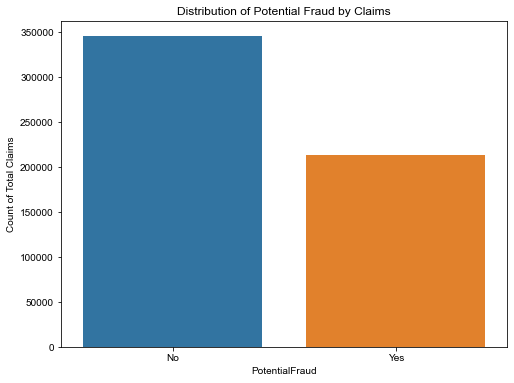

In [20]:
#How many potential fraud claims are happening in total?
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train_ProviderWithPatientDetails)
ax.set_title('Distribution of Potential Fraud by Claims')
ax.set_ylabel('Count of Total Claims')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_total = pd.value_counts(Train_ProviderWithPatientDetails['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud by Claims:- \n",round(count_total*100/len(Train_ProviderWithPatientDetails), 2))
LABELS = ["Non Fraud", "Fraud"]

Percent Distribution of Potential Fraud Providers:- 
 No     90.65
Yes     9.35
Name: PotentialFraud, dtype: float64


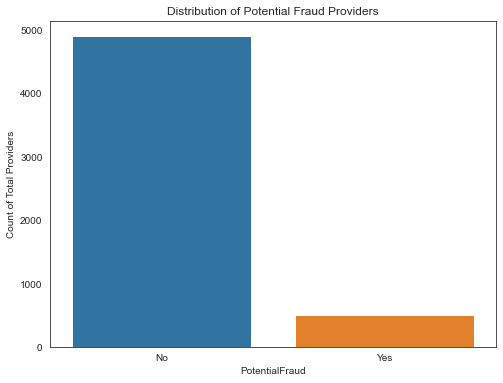

In [21]:
#How many potential fraud provider are there?

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train)
ax.set_title('Distribution of Potential Fraud Providers')
ax.set_ylabel('Count of Total Providers')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud Providers:- \n",round(count_provider*100/len(Train), 2))
LABELS = ["Non Fraud", "Fraud"]

Text(0, 0.5, 'Count of Total Claims by Providers')

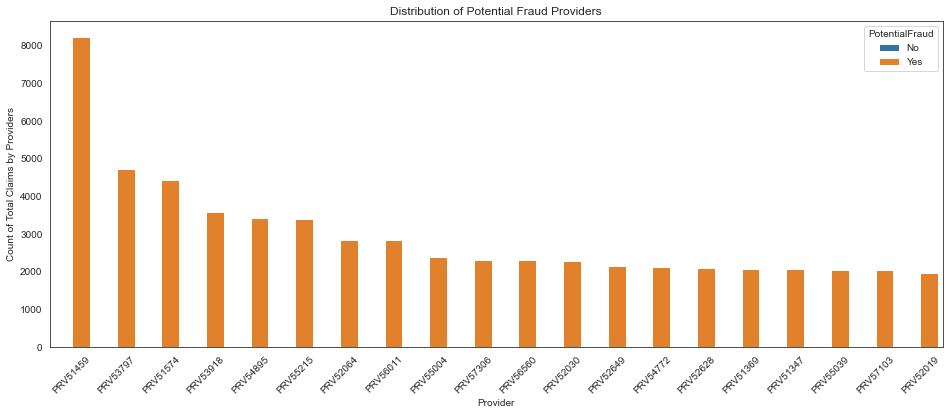

In [22]:
#Top Providers based on total Number of claims
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x='Provider', hue = 'PotentialFraud',  data=Train_ProviderWithPatientDetails              
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
ax.set_title('Distribution of Potential Fraud Providers')
plt.xticks(rotation=45)
ax.set_ylabel('Count of Total Claims by Providers')

In [23]:
#PLotting the frequencies of Age beneficiaries
count_Age = pd.value_counts(Train_Beneficiary['Age'],bins = 20)

#Drawing a barplot
grouped_Age = (count_Age / len(Train_Beneficiary['Age'])).to_frame()
grouped_Age = grouped_Age.reset_index()
grouped_Age = grouped_Age.sort_values('index')

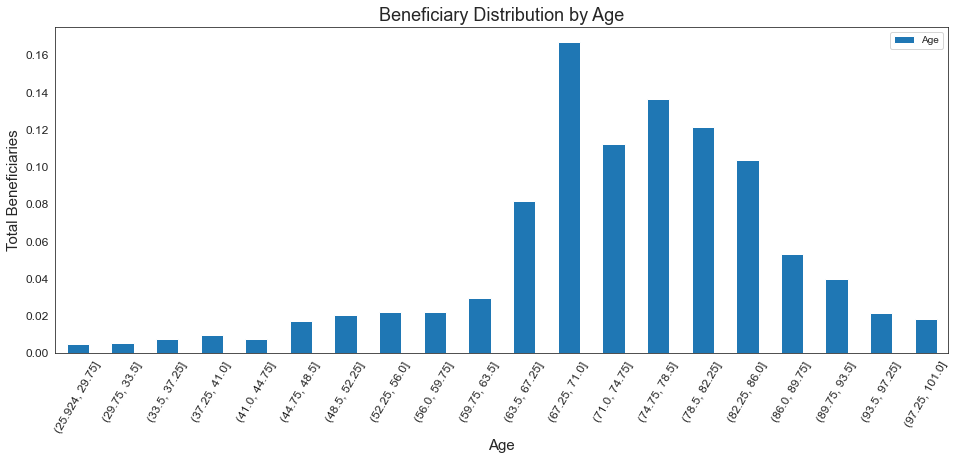

In [24]:
grouped_Age.plot(x = 'index', kind = 'bar', rot = 60, figsize=(16, 6), fontsize = 12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Age",fontsize=18)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Total Beneficiaries",fontsize=15)
plt.show()

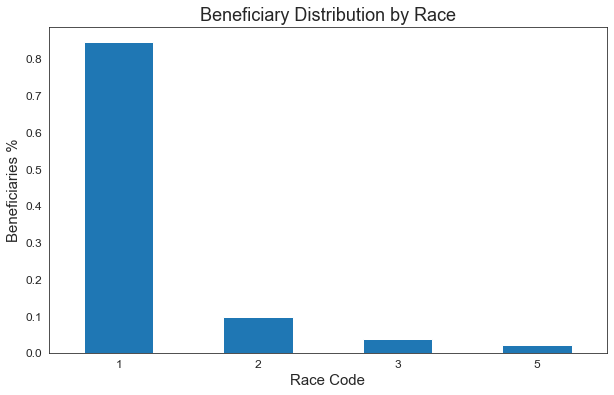

In [25]:
count_Race = pd.value_counts(Train_Beneficiary['Race'], sort = True)

#Drawing a barplot
(count_Race/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Beneficiaries "'%',fontsize=15)
plt.show()


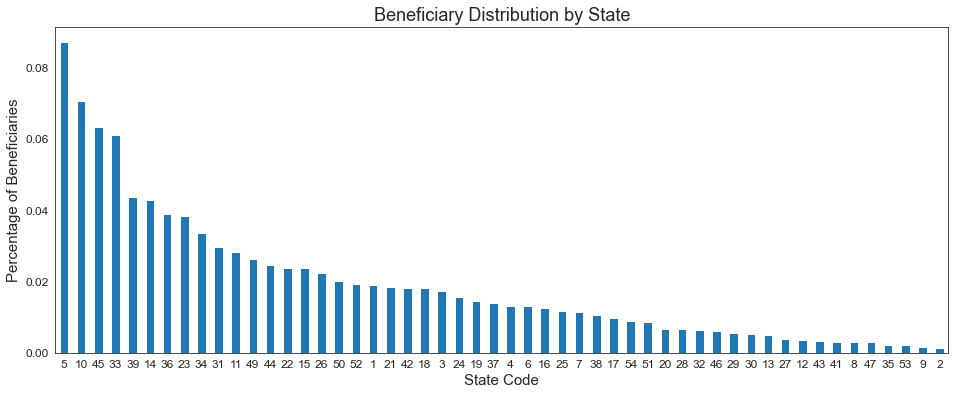

In [26]:
count_State = pd.value_counts(Train_Beneficiary['State'], sort = True)

#Drawing a barplot
(count_State/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by State",fontsize=18)
plt.xlabel("State Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries",fontsize=15)
plt.show()

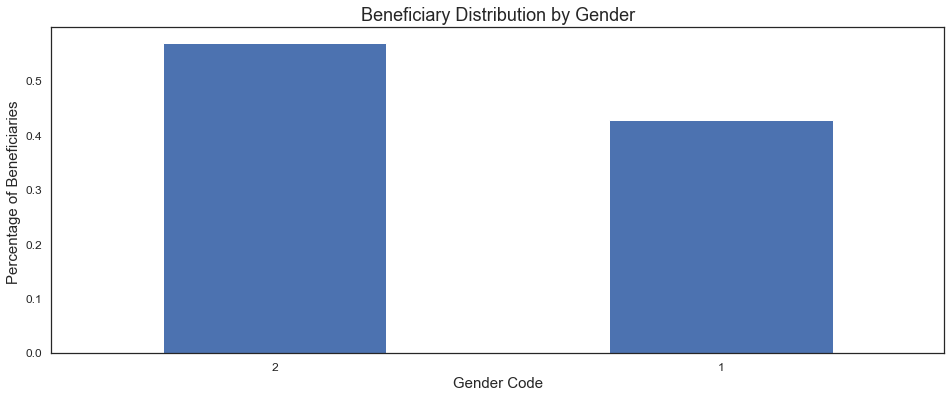

In [55]:
count_Gender = pd.value_counts(Train_Beneficiary['Gender'], sort = True)

## Add Color

#Drawing a barplot
(count_Gender/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Gender",fontsize=18)
plt.xlabel("Gender Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries ",fontsize=15)
plt.show()

In [28]:
#Combine all Claim Procedure codes
Train_Procedures =  pd.DataFrame(columns = ['Procedures'])
Train_Procedures['Procedures'] = pd.concat([Train_ProviderWithPatientDetails['ClmProcedureCode_1'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_2'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_3'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_4'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_5'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [29]:
grouped_Train_Procedures = Train_Procedures['Procedures'].value_counts()

In [30]:
grouped_Train_Procedures = grouped_Train_Procedures.to_frame()

In [31]:
grouped_Train_Procedures.columns = ['count']

In [32]:
grouped_Train_Procedures['Procedure'] = grouped_Train_Procedures.index
grouped_Train_Procedures['Percentage'] = (grouped_Train_Procedures['count']/sum(grouped_Train_Procedures['count']))*100

In [33]:
#Return Top 20 Procedures
grouped_Train_Procedures = grouped_Train_Procedures.head(20)

In [34]:
grouped_Train_Procedures

,count,Procedure,Percentage
4019.0,1959,4019.0,6.552716
9904.0,1152,9904.0,3.853358
2724.0,1054,2724.0,3.525555
8154.0,1022,8154.0,3.418518
66.0,901,66.0,3.013781
3893.0,854,3893.0,2.856569
3995.0,809,3995.0,2.706048
4516.0,651,4516.0,2.177549
3722.0,589,3722.0,1.970163
8151.0,463,8151.0,1.548702


Text(0, 0.5, '% of Total Claims')

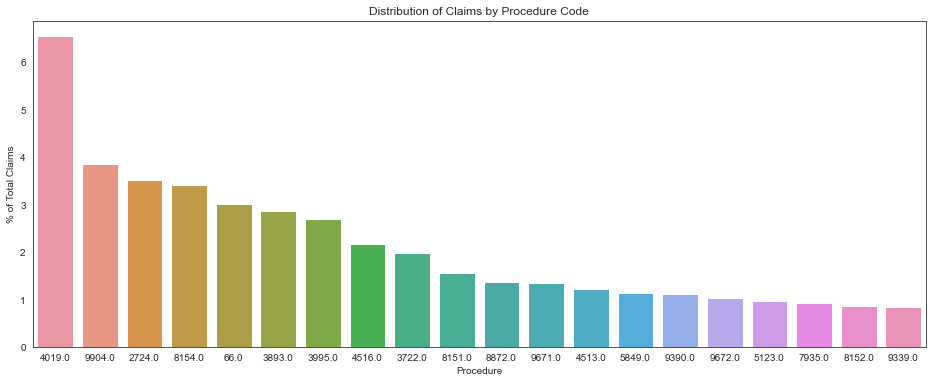

In [35]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Procedure', y = 'Percentage', data=grouped_Train_Procedures, 
            order=grouped_Train_Procedures.sort_values('Percentage',ascending = False).Procedure)
ax.set_title('Distribution of Claims by Procedure Code')
ax.set_ylabel('% of Total Claims')

In [36]:
#Combine all Claim Procedure codes
Train_Diagnosis =  pd.DataFrame(columns = ['Diagnosis'])
Train_Diagnosis['Diagnosis'] = pd.concat([Train_ProviderWithPatientDetails['ClmDiagnosisCode_1'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_2'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_3'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_4'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_5'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_6'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_7'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_8'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_9'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [37]:
grouped_Train_Diagnosis = Train_Diagnosis['Diagnosis'].value_counts()

In [38]:
grouped_Train_Diagnosis = grouped_Train_Diagnosis.to_frame()

In [39]:
grouped_Train_Diagnosis.columns = ['count']

In [40]:
grouped_Train_Diagnosis['Diagnosis'] = grouped_Train_Diagnosis.index
grouped_Train_Diagnosis['Percentage'] = (grouped_Train_Diagnosis['count']/sum(grouped_Train_Diagnosis['count']))*100

In [41]:
#Return Top 20 Procedures
grouped_Train_Diagnosis = grouped_Train_Diagnosis.head(20)

In [42]:
grouped_Train_Diagnosis

,count,Diagnosis,Percentage
4019,77056,4019,4.584713
25000,37356,25000,2.222624
2724,35763,2724,2.127843
V5869,24904,V5869,1.481749
4011,23773,4011,1.414457
42731,20138,42731,1.198180
V5861,20001,V5861,1.190029
2720,18268,2720,1.086918
2449,17600,2449,1.047173
4280,15507,4280,0.922642


Text(0, 0.5, '% of Total Claims')

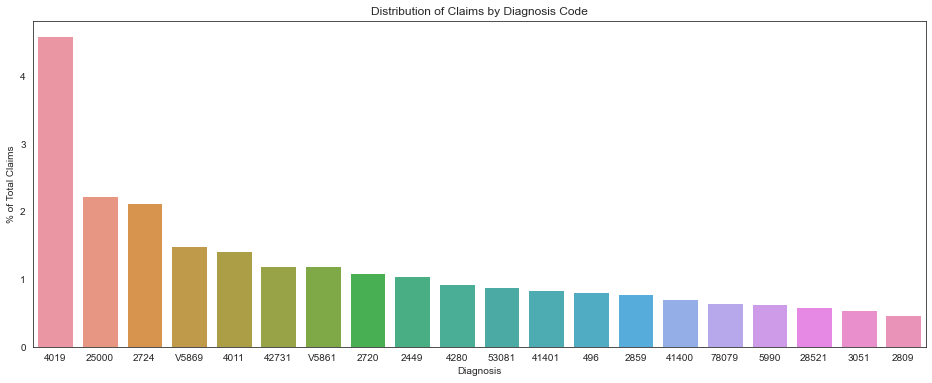

In [43]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Diagnosis', y = 'Percentage', data=grouped_Train_Diagnosis, 
            order=grouped_Train_Diagnosis.sort_values('Percentage',ascending = False).Diagnosis)
ax.set_title('Distribution of Claims by Diagnosis Code')
ax.set_ylabel('% of Total Claims')

Text(0.5, 1.0, 'Top 20 Attending Physicians')

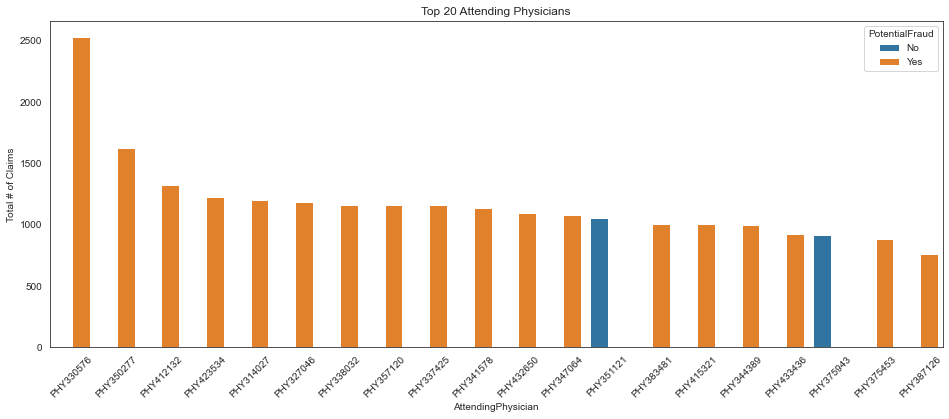

In [44]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.AttendingPhysician.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Attending Physicians")

## change to vertical barplot for visual

Text(0.5, 1.0, 'Top 20 Providers')

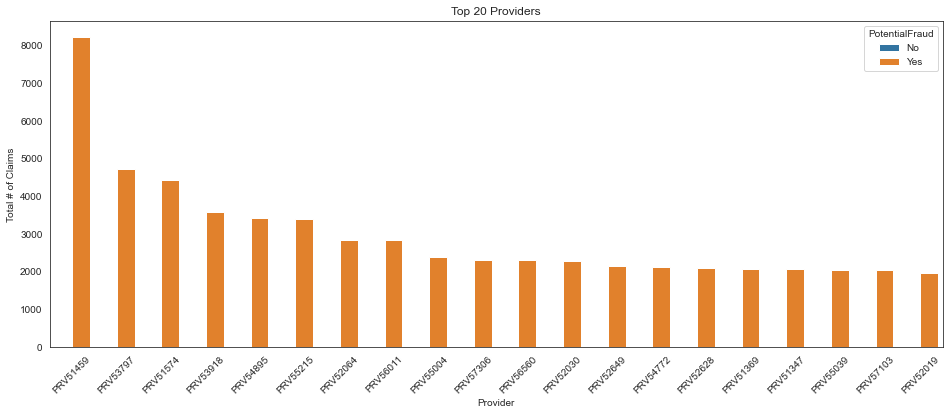

In [45]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider', hue = 'PotentialFraud', data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Providers")

Text(0.5, 1.0, 'Top 20 Potential Fraud Providers')

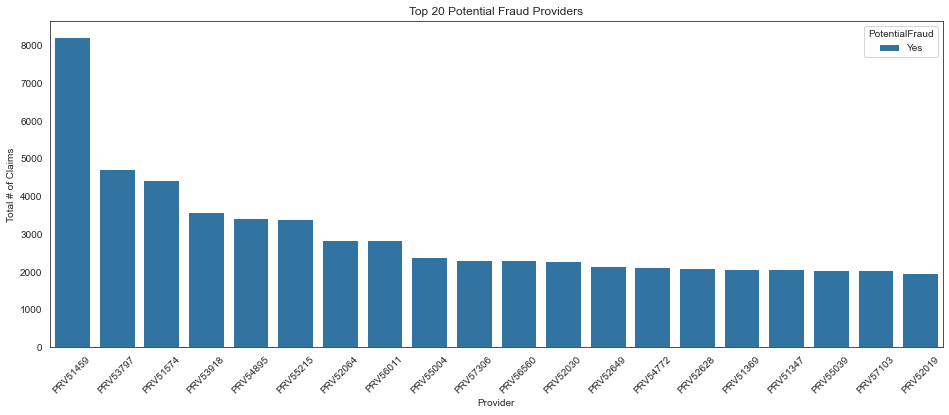

In [46]:
Fraud_Train_ProviderWithPatientDetails = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'Yes']

f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',hue='PotentialFraud',data=Fraud_Train_ProviderWithPatientDetails
              ,order=Fraud_Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Potential Fraud Providers")

Text(0.5, 1.0, 'Top 20 Non-Fraud Providers')

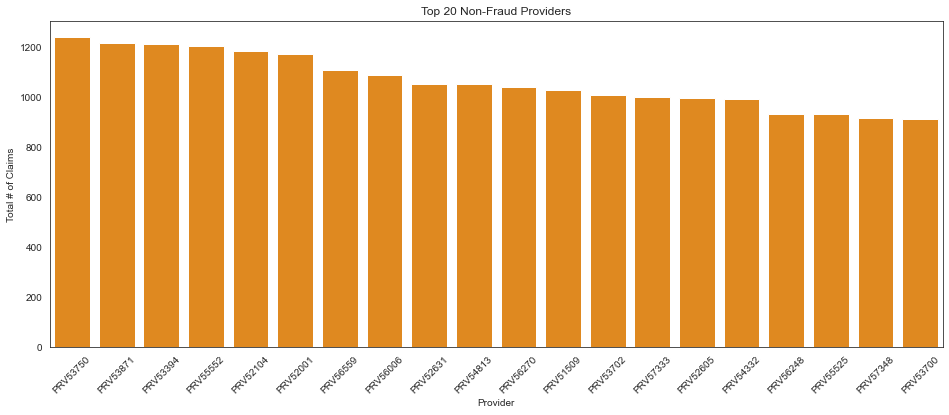

In [47]:
NonFraud_Train_ProviderWithPatientDetails = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'No']

f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',data=NonFraud_Train_ProviderWithPatientDetails, color = 'darkorange'
              ,order=NonFraud_Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Non-Fraud Providers")

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualReimbursementAmt'>

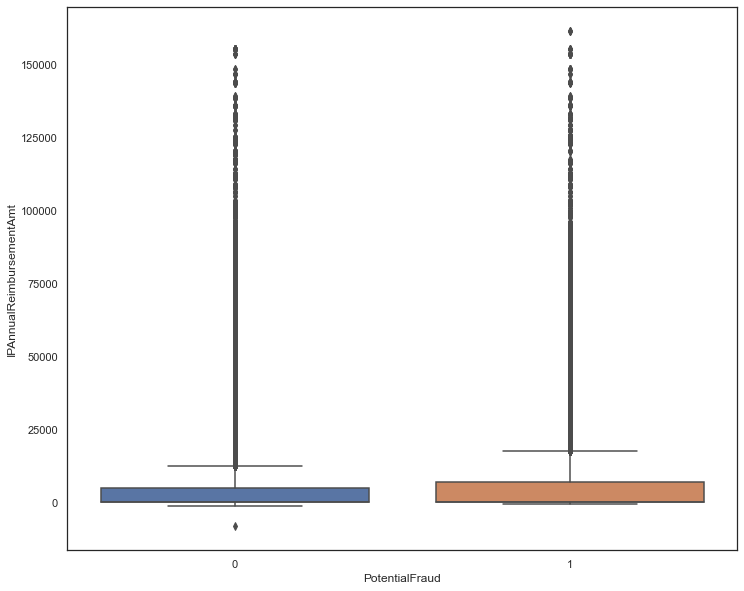

In [57]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x='PotentialFraud',y='IPAnnualReimbursementAmt', data=Train_ProviderWithPatientDetails)

In [58]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(Train_ProviderWithPatientDetails['IPAnnualReimbursementAmt'], Train_ProviderWithPatientDetails['IPAnnualReimbursementAmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha: print('Same distribution (fail to reject H0)')
else: print('Different distribution (reject H0)')

Statistics=155799760260.500, p=0.500
Same distribution (fail to reject H0)


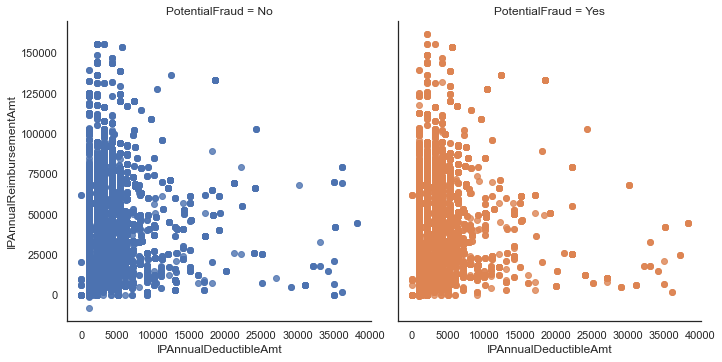

In [48]:
## Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(16,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetails)

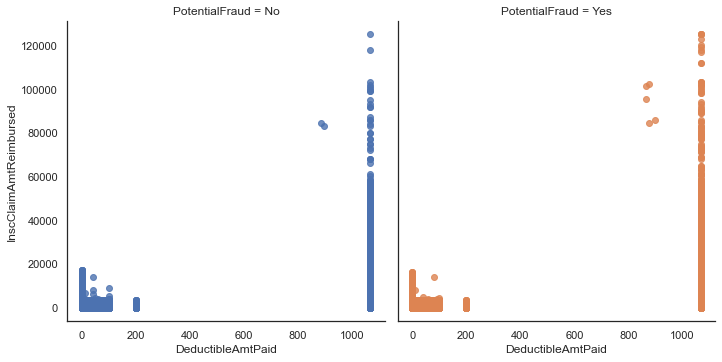

In [49]:
## Plot DeductibleAmtPaid and InsClaimAmtReimbursed in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetails)

In [50]:
#Replace the PotentialFraud values Yes = 1 and No = 0
Train_ProviderWithPatientDetails.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)

In [ ]:
x = Train_ProviderWithPatientDetails[['Age', ]]

In [51]:
# the independent variables set 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = Train_ProviderWithPatientDetails.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Train_ProviderWithPatientDetails.values, i) 
                          for i in range(len(Train_ProviderWithPatientDetails.columns))] 
pd.set_option('display.max_rows', 100)
vif_data

C:\Users\teren\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [65]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(Train_AllPatientDetails, Test_AllPatientDetails)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

ValueError: could not convert string to float: 'BENE11001'